In [1]:
import gym
import numpy as np
import torch as T
from DQN import Agent

from disc_env import DiffDriveEnv
from utils import plotLearning

In [2]:
save_path = "models/"
save_file = "robot_model_0.pt"

In [3]:
def convert_observation(dictonary):
    observation = np.zeros(8, dtype=np.float32)
    observation[0:3] = dictonary['agent']
    observation[3:5] = dictonary['target']
    observation[5:7] = dictonary['obstical']
    observation[7] = dictonary['time']
    return observation

In [4]:
env = DiffDriveEnv()

In [5]:
#     env.render_mode = "human"
agent = Agent(gamma=0.99, epsilon=1, batch_size=512, n_actions=8, eps_end=0.01,input_dims=[8], lr=0.003)

episode  0 score -51.00 average score -51.00 completed 0 epsilon 1.00
episode  50 score -49.00 average score -41.62 completed 3 epsilon 0.01
episode  100 score 100.00 average score -9.93 completed 24 epsilon 0.01
episode  150 score 100.00 average score 47.24 completed 41 epsilon 0.01
episode  200 score 100.00 average score 75.93 completed 43 epsilon 0.01
episode  250 score 100.00 average score 80.40 completed 44 epsilon 0.01
episode  300 score 100.00 average score 84.89 completed 46 epsilon 0.01
episode  350 score 100.00 average score 89.42 completed 47 epsilon 0.01
episode  400 score 100.00 average score 86.42 completed 44 epsilon 0.01
episode  450 score 100.00 average score 83.40 completed 45 epsilon 0.01
episode  500 score -50.80 average score 87.91 completed 47 epsilon 0.01
episode  550 score 100.00 average score 87.91 completed 45 epsilon 0.01
episode  600 score 100.00 average score 81.88 completed 43 epsilon 0.01
episode  650 score 100.00 average score 84.90 completed 47 epsilon 

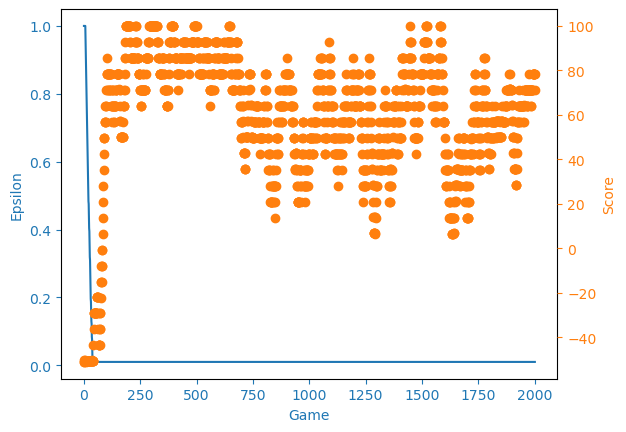

In [6]:
scores, eps_history = [], []
n_games = 2000

finished = 0
for i in range(n_games):
    observation = np.zeros(8, dtype=np.float32)
    score = 0
    done = False
    observation, info = env.reset()     
    observation = convert_observation(observation)
#         for _ in range(50):
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info, completed = env.step(action)
        observation_ = convert_observation(observation_)
#             score += reward 
        agent.store_transition(observation, action, reward, 
                                observation_, done)
        agent.learn()
        observation = observation_
    scores.append(reward)
    if completed: 
            finished +=1
    eps_history.append(agent.epsilon)

    avg_score = np.mean(scores[-100:])
    if i % 50 == 0:
        print('episode ', i, 'score %.2f' % reward,
                'average score %.2f' % avg_score, 'completed %d' % finished,
                'epsilon %.2f' % agent.epsilon)
        finished = 0
x = [i+1 for i in range(n_games)]
filename = 'score.png'
plotLearning(x, scores, eps_history, filename)

In [17]:
env.render_mode = "human"
observation, info = env.reset() 

In [18]:
done = False
while not done:
    observation = convert_observation(observation)
    action = agent.choose_action(observation)
    observation, reward, done, info, completed = env.step(action)
    if completed:
        print("completed")

completed


In [19]:
T.save(agent.state_dict(), save_path + save_file)

In [ ]:
agent = load_agent

In [ ]:
load_agent = Agent(gamma=0.99, epsilon=1, batch_size=512, n_actions=8, eps_end=0.01,input_dims=[6], lr=0.003)

load_agent.load_state_dict(T.load(save_path + save_file))